# Final Project Code

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [116]:
from __future__ import print_function, division

%matplotlib inline
import pandas as pd
import numpy as np

import nsfg
import first
import thinkplot
import thinkstats2

from collections import Counter

df = pd.read_csv('../Final_Project/CrashReport2014.csv', low_memory=False)

df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292019 entries, 0 to 292018
Data columns (total 80 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID    292019 non-null  object 
 1   geodb_oid   292019 non-null  int64  
 2   ROUTE       113528 non-null  object 
 3   YEAR        292019 non-null  int64  
 4   MONTH       292019 non-null  int64  
 5   DAY         292019 non-null  int64  
 6   HOUR        292019 non-null  int64  
 7   DAY_O_WEEK  292019 non-null  object 
 8   NUM_VEH     292019 non-null  int64  
 9   INJURIES    292019 non-null  int64  
 10  FATALITIES  292019 non-null  int64  
 11  COLL_TYPE   292019 non-null  object 
 12  WEATHER     284145 non-null  object 
 13  LIGHTING    285219 non-null  object 
 14  SURF_COND   281465 non-null  object 
 15  RD_DEFECT   254945 non-null  object 
 16  RD_FEATURE  292019 non-null  object 
 17  TRAF_CNTRL  287605 non-null  object 
 18  COUNTY      292019 non-null  int64  
 19  TO

### Histogram -- Injuries

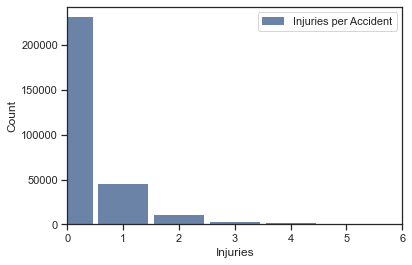

In [41]:
hist = thinkstats2.Hist(df.INJURIES, label='Injuries per Accident')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Injuries', ylabel='Count', xlim=[0, 6])

inj_mean = df.INJURIES.mean()
inj_std = df.INJURIES.std()
inj_var = df.INJURIES.var()

In [42]:
inj_mean, inj_std, inj_var

(0.2873922587228913, 0.6777496605046021, 0.4593446023141033)

### Histogram -- Fatalities

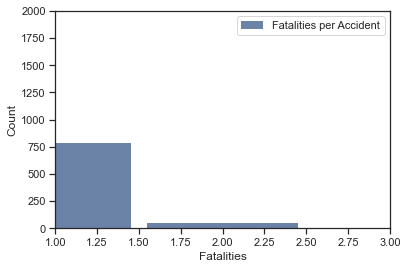

In [43]:
hist = thinkstats2.Hist(df.FATALITIES, label='Fatalities per Accident')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Fatalities', ylabel='Count', xlim=[1, 3], ylim=[0, 2000])

fata_mean = df.FATALITIES.mean()
fata_std = df.FATALITIES.std()
fata_var = df.FATALITIES.var()

In [44]:
fata_mean, fata_std, fata_var

(0.0031367821956790483, 0.06162909218114471, 0.003798145003072032)

### Histogram -- Collision Types

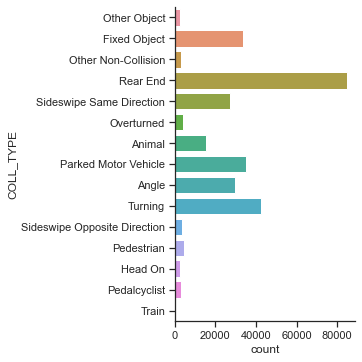

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(y="COLL_TYPE", kind="count", data=df)

### Histogram -- Weather

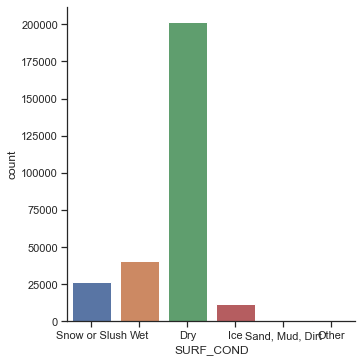

In [34]:
sns.catplot(x="SURF_COND", kind="count", data=df)

### Histogram -- Traffic Control

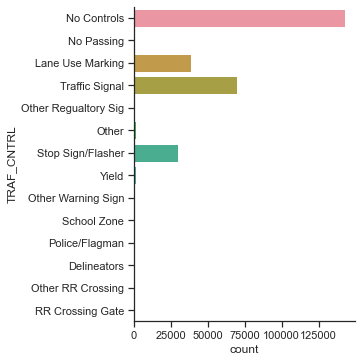

In [40]:
sns.catplot(y="TRAF_CNTRL", kind="count", data=df)

### Histogram -- Number of Vehicles

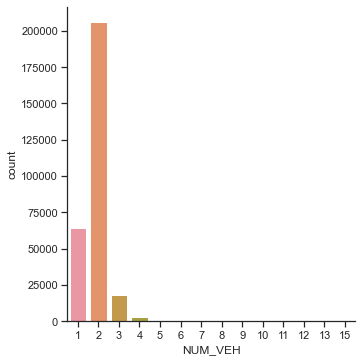

In [67]:
sns.catplot(x="NUM_VEH", kind="count", data=df)

In [68]:
veh_num_mean = df.NUM_VEH.mean()
veh_num_std = df.NUM_VEH.std()
veh_num_var = df.NUM_VEH.var()

veh_num_mean, veh_num_std, veh_num_var

(1.86999133618018, 0.580815289181151, 0.33734640014658407)

### PMF with Collision Types

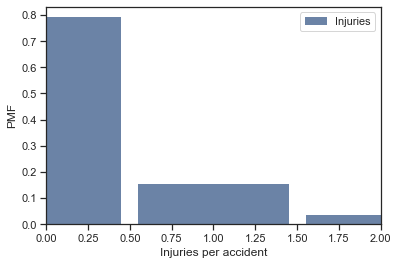

In [50]:
inj_pmf = thinkstats2.Pmf(df.INJURIES, label='Injuries')

thinkplot.Hist(inj_pmf)
thinkplot.Config(xlabel='Injuries per accident', ylabel='PMF',
                 xlim=[0, 2])

### CDF with Number of Vehicles in Accident

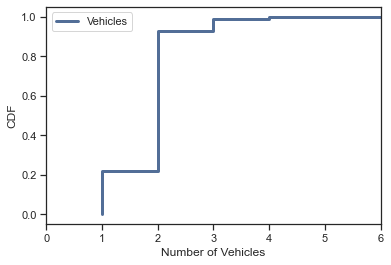

In [66]:
num_veh_cdf = thinkstats2.Cdf(df.NUM_VEH, label='Vehicles')
thinkplot.Cdf(num_veh_cdf)
thinkplot.Config(xlabel='Number of Vehicles', ylabel='CDF', loc='upper left',
                xlim=[0, 6])

In [70]:
import analytic

### Normal Probability Plot

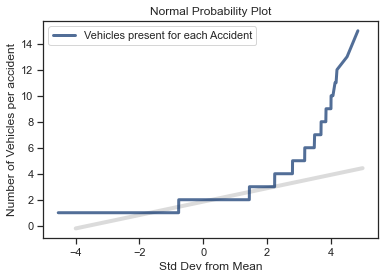

In [76]:
inj_npp = df.NUM_VEH

mean, var = thinkstats2.TrimmedMeanVar(inj_npp, p=0.01)
std = np.sqrt(var)

xs = [-4, 5]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(inj_npp)
thinkplot.Plot(xs, ys, label='Vehicles present for each Accident')

thinkplot.Config(title='Normal Probability Plot',
               xlabel='Std Dev from Mean',
               ylabel='Number of Vehicles per accident')

### Scatterplots of injuries and Traffic Controls

In [90]:
import brfss

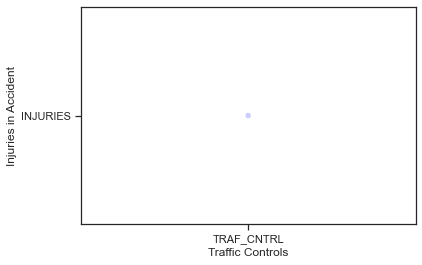

In [93]:
thinkplot.Scatter(, )
thinkplot.Config(xlabel='Traffic Controls',
                ylabel= 'Injuries in Accident',
                legend=False)

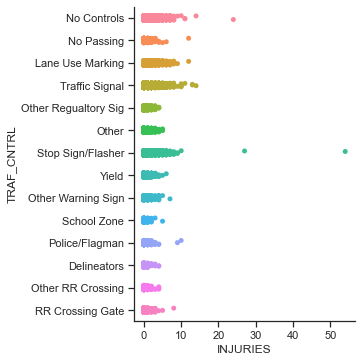

In [96]:
sns.catplot(x='INJURIES', y='TRAF_CNTRL', data=df)

### Testing Correlation of Injuries and Number of Vehicles involved.

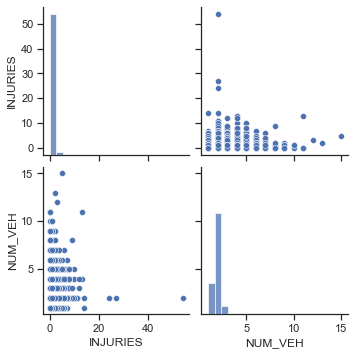

In [103]:
scat_df = df.get(["INJURIES", "NUM_VEH"])

sns.pairplot(scat_df)
plt.show()

### Linear Regression

In [107]:
import statsmodels.formula.api as smf

formula = 'INJURIES ~ NUM_VEH'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               INJURIES   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     875.0
Date:                Sat, 14 Aug 2021   Prob (F-statistic):          5.26e-192
Time:                        18:34:13   Log-Likelihood:            -3.0033e+05
No. Observations:              292019   AIC:                         6.007e+05
Df Residuals:                  292017   BIC:                         6.007e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1681      0.004     39.822      0.000       0.160       0.176
NUM_VEH        0.0638      0.002     29.580      0.000       0.060       0.068
==============================================================================
Omnibus:                   339726.973   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        340645831.658
Skew:                           5.321   Prob(JB):                         0.00
Kurtosis:                     169.983   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
inter = results.params['Intercept']
slope = results.params['NUM_VEH']
inter, slope

(0.16812798081135227, 0.06377798420988594)

In [110]:
slope_pval = results.pvalues['NUM_VEH']
slope_pval

5.257379056214191e-192

In [111]:
results.rsquared

0.0029873013835907125